## Transit Modelling Workbook  
  
  - set up for TESS (although this should be generic enough for any data set)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [2]:
import autotransit as au

## Notebook parameters

In [3]:
toi_file="TOI_2020.05.20_06.33.19.csv" #nexsci catalogue for TOI parameters 

In [4]:
def detrend(phot,detrend_win,nfitp=4,nc=20,itime=0.02083):
    
    npt=len(phot.time)
    ts=np.zeros(npt,dtype=int)
    tflag=np.zeros(npt,dtype=int) #for marking transits
    boxbin=np.copy(detrend_win)
    x=np.zeros(npt) #work arrays
    y=np.zeros(npt)
    z=np.zeros(npt)
    ngap=0
    gaps=np.zeros(npt)
    offset=np.zeros(npt)
    work=np.zeros(npt)
    
    phot_d=tf.phot_class()
    phot_d.time=np.copy(phot.time)
    phot_d.flux=np.copy(phot.flux)
    phot_d.ferr=np.copy(phot.ferr)
    phot_d.itime=np.copy(phot.itime)
    
    detrend5.polyfilter(phot_d.time,phot_d.flux,phot_d.ferr,ts,tflag,boxbin,x,y,z,ngap,gaps,\
                        offset,nfitp,work,nc,itime)
    
    return phot_d

## readtoicsv  
  
  This routine reads in a CSV file as downloaded from NexSCI (is there an API for this?)  
    
  The following values are stored in exocat_class

    exocat.ticid = TIC ID (int) 
    exocat.toiid = TOI ID (float)  
    exocat.toiid_str = TIC ID (string)
    exocat.ra = RA (float)
    exocat.dec = DEC (float)
    exocat.tmag = TESS mag (float)
    exocat.t0 = Centre of transit time (float) [days]
    exocat.t0err = uncertainity on t0 [days]
    exocat.per = orbital period (float) [days]
    exocat.pererr = uncertainity of per (float) [days]
    exocat.tdur = transit duration (float) [days]
    exocat.tdurerr = errors on tdur (float) [days]
    exocat.tdep = transit depth (float) [ppm]
    exocat.tdeperr = error on tdep (float) [ppm]


In [4]:
exocat=au.readtoicsv(toi_file)

## Fetch SC TESS Lightcurve

In [5]:
i=300 #index from exocat

u_ticid=exocat.ticid[i]
print(u_ticid,exocat.toiid[i])


#Get SC Lightcurve for MAST

phot_SC=get_tess_data(u_ticid)  #give the TIC_ID and return SC data.


355867695 1260.02


NameError: name 'get_tess_data' is not defined

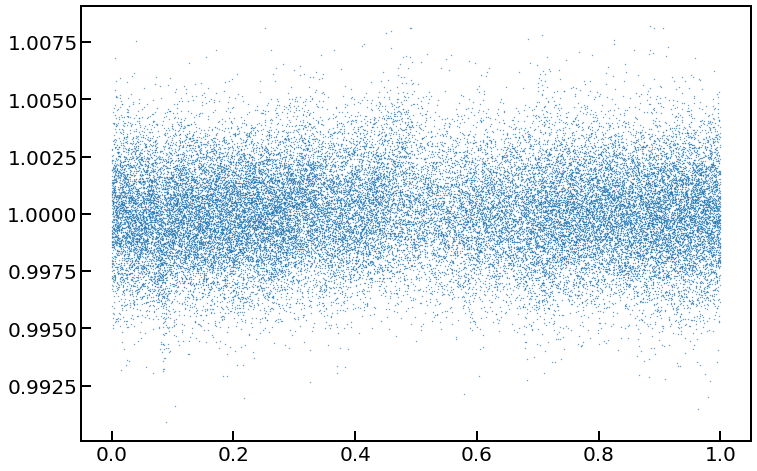

In [39]:
per=exocat.per[i]

matplotlib.rcParams.update({'font.size': 20}) #adjust font
matplotlib.rcParams['axes.linewidth'] = 2.0
plt.figure(figsize=(12,8)) #adjust size of figure
ax = plt.axes()
ax.tick_params(direction='in', length=10, width=2)
ax.scatter(phot_SC.time/per-np.floor(phot_SC.time/per),phot_SC.flux,s=0.1)
#ax.set_ylim(31700,31900)
plt.show()